In [1]:
import numpy as np
import pandas as pd
import env
from scipy import stats
import wrangle as acq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#for sample data
import pydataset

#for modeling, KNN since it's a distance based model
from sklearn.neighbors import KNeighborsClassifier

#import the 2 kinds of scalers
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = acq.get_zillow_data()

csv file found and loaded


In [3]:
df = acq.prep_data(df)

In [4]:
df.head()

,Bedrooms,Bathrooms,SqFt,Value,Yr Built,Tax,County
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA


In [5]:
df.describe()

,Bedrooms,Bathrooms,SqFt,Value,Yr Built,Tax
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Bedrooms   float64
 1   Bathrooms  float64
 2   SqFt       float64
 3   Value      float64
 4   Yr Built   float64
 5   Tax        float64
 6   County     object 
dtypes: float64(6), object(1)
memory usage: 130.6+ MB


#Split dataset into two components
X, Y = acq.split_my_data(df)

# splitting data into train, validate, and test
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

In [7]:
train, validate, test = acq.split_data(df)

In [8]:
train.head()

,Bedrooms,Bathrooms,SqFt,Value,Yr Built,Tax,County
1268902,4.0,2.0,2235.0,377671.0,1977.0,4175.02,Orange County
613034,3.0,2.5,1975.0,687000.0,1967.0,7097.42,Orange County
2040503,4.0,2.0,1796.0,625494.0,1963.0,11386.63,LA
2045869,3.0,2.5,2607.0,557360.0,2000.0,6353.84,Ventura
744180,4.0,2.0,1792.0,205082.0,1957.0,2579.19,LA


In [9]:
# Compare 1 feature against the value at a time

In [10]:
# df.shape()

In [11]:
train.shape

(1284141, 7)

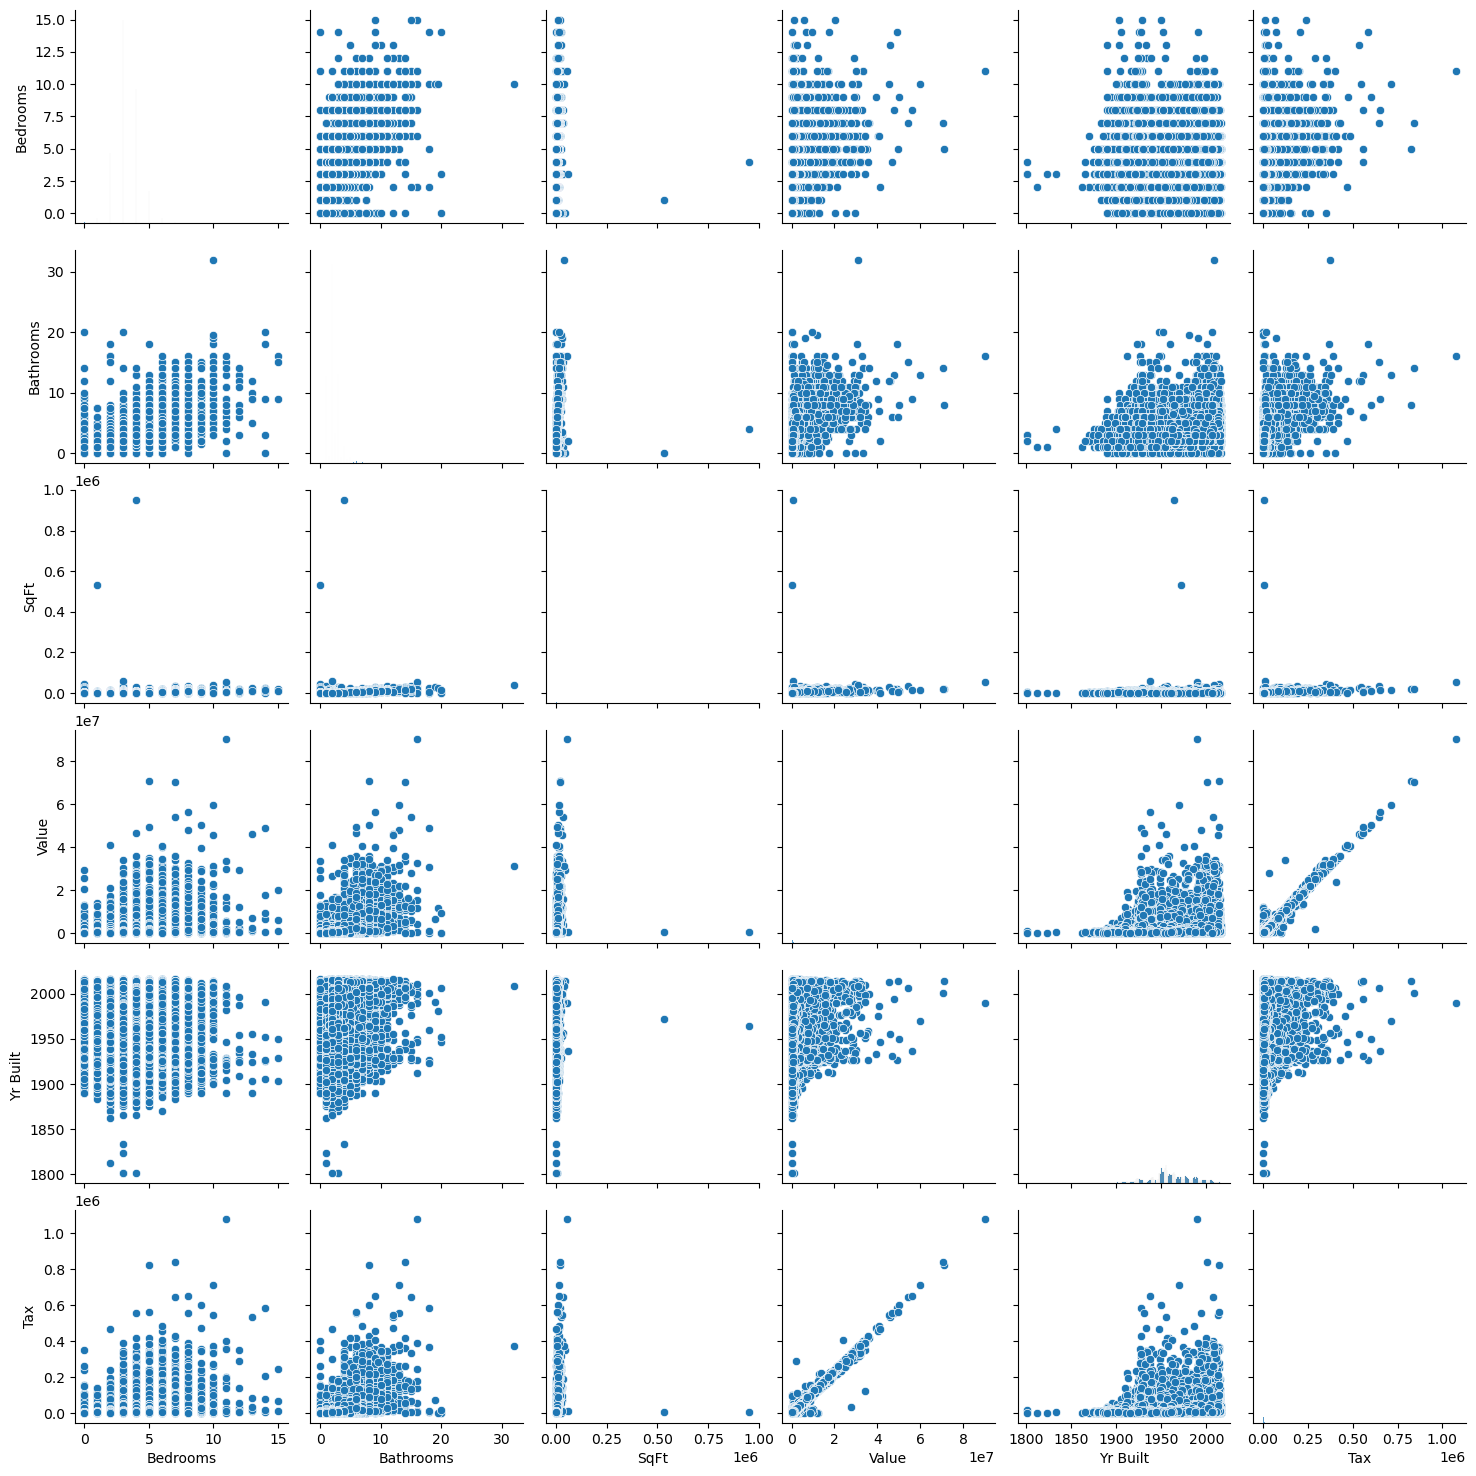

In [12]:
sns.pairplot((train))
plt.show()

In [13]:
# Explore the relationship between bathroom and value
#Explore the relationship between bathroom and bedroom
# Explore the relationship between bedroom and value

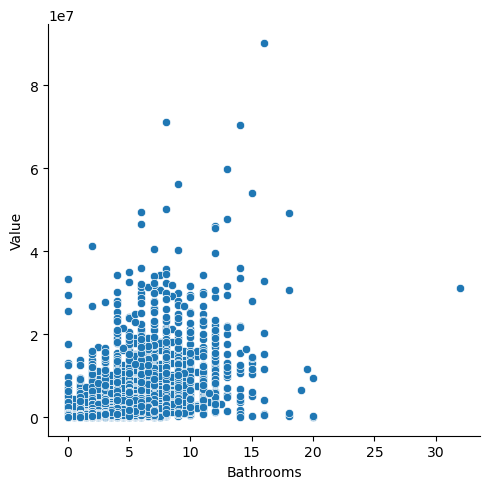

In [14]:
sns.relplot(data=train, x='Bathrooms', y='Value')
plt.show()

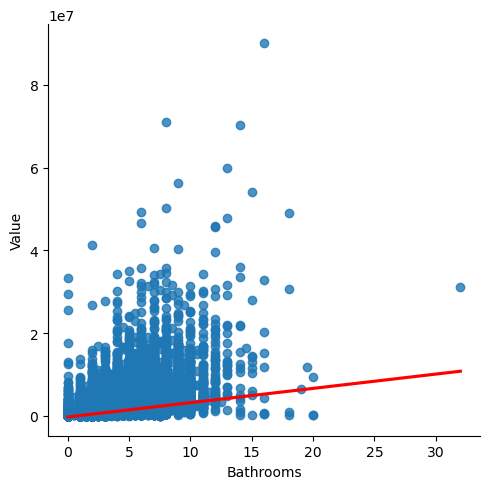

In [15]:
#what is a figure-level function

sns.lmplot(data=train, x='Bathrooms', y='Value', line_kws ={'color': 'red'})
plt.show()

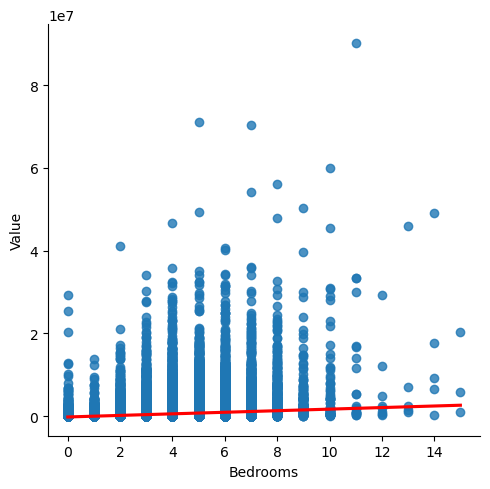

In [16]:
sns.lmplot(data=train, x='Bedrooms', y='Value', line_kws ={'color': 'red'})
plt.show()

In [17]:
#graph comparing county, value, and tax



In [18]:
value_corr = train.corr(method='spearman')
value_corr

,Bedrooms,Bathrooms,SqFt,Value,Yr Built,Tax
Bedrooms,1.000000,0.634800,0.655636,0.295955,0.425683,0.297532
Bathrooms,0.634800,1.000000,0.826234,0.482223,0.569819,0.481869
SqFt,0.655636,0.826234,1.000000,0.524024,0.511859,0.521628
Value,0.295955,0.482223,0.524024,1.000000,0.290479,0.978601
Yr Built,0.425683,0.569819,0.511859,0.290479,1.000000,0.289015
Tax,0.297532,0.481869,0.521628,0.978601,0.289015,1.000000


In [19]:
value_corr_1 = train.corr(method='pearson')
value_corr_1

,Bedrooms,Bathrooms,SqFt,Value,Yr Built,Tax
Bedrooms,1.000000,0.642655,0.429959,0.257532,0.376174,0.258701
Bathrooms,0.642655,1.000000,0.592902,0.501055,0.508455,0.501620
SqFt,0.429959,0.592902,1.000000,0.434095,0.311469,0.432662
Value,0.257532,0.501055,0.434095,1.000000,0.189008,0.990846
Yr Built,0.376174,0.508455,0.311469,0.189008,1.000000,0.190498
Tax,0.258701,0.501620,0.432662,0.990846,0.190498,1.000000


In [20]:
t_stat, p_value = stats.ttest_ind(train.Bathrooms, train.Bedrooms, equal_var=False)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -882.2390423821602
p-value: 0.0


In [22]:
to_scale = ['Bedrooms','Bathrooms','SqFt','Yr Built','Tax']

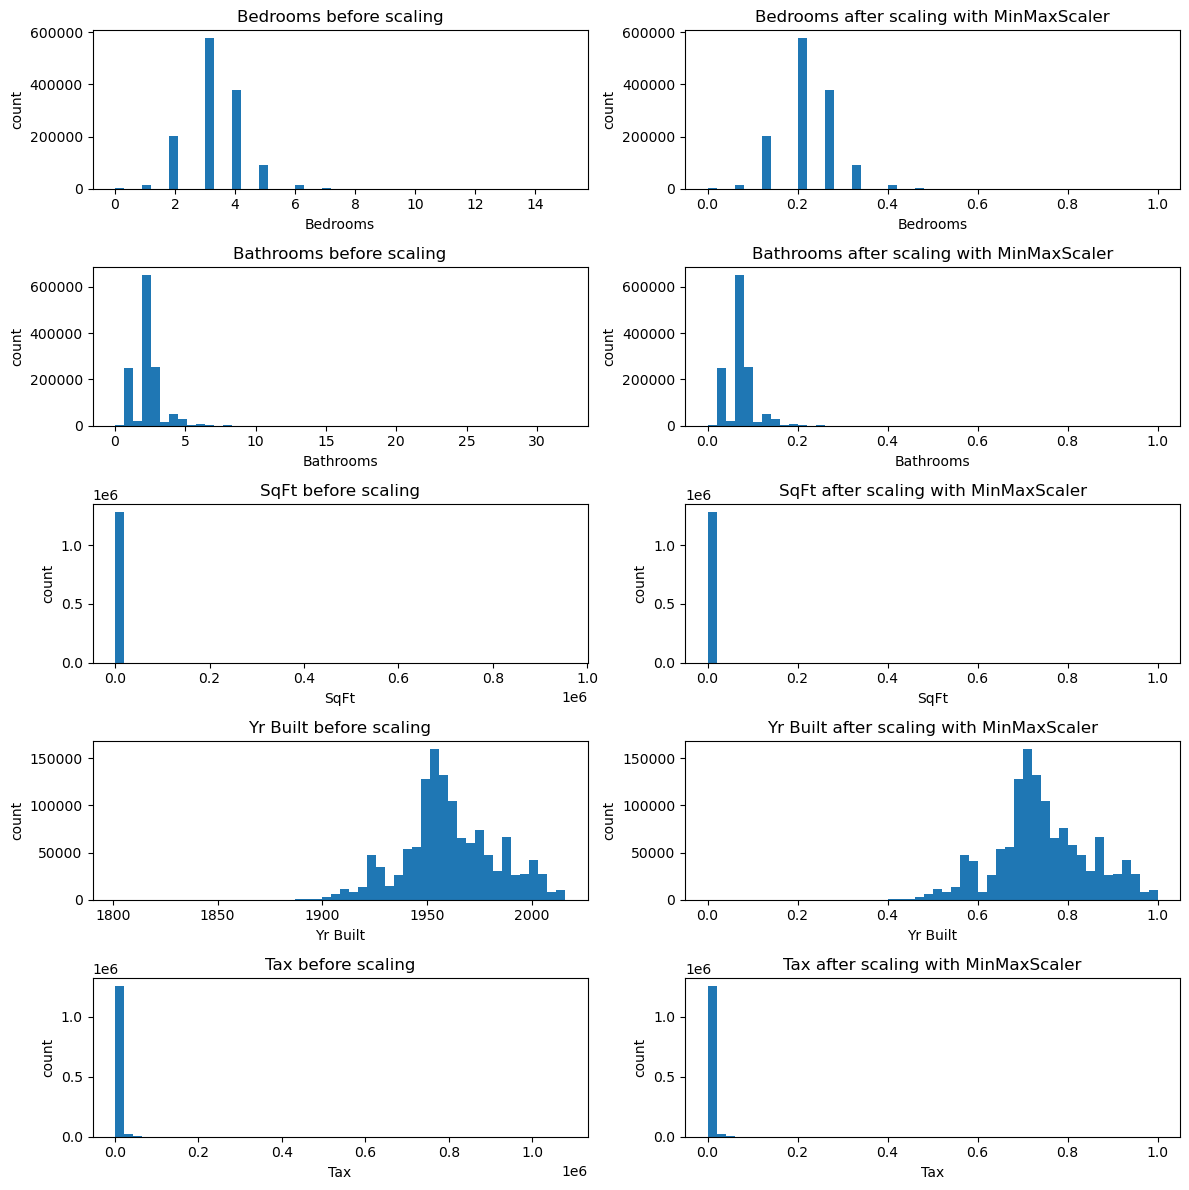

In [23]:
acq.visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

In [ ]:
to_scale = ['Bedrooms','Bathrooms','SqFt','Yr Built','Tax']

In [ ]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    plt.show()

In [ ]:
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

In [ ]:
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

In [ ]:
visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

In [25]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [26]:
# prefer spearman due to discrete values
value_corr = train_scaled.corr(method='spearman')
value_corr

,Bedrooms,Bathrooms,SqFt,Yr Built,Tax
Bedrooms,1.000000,0.634800,0.655636,0.425683,0.297532
Bathrooms,0.634800,1.000000,0.826234,0.569819,0.481869
SqFt,0.655636,0.826234,1.000000,0.511859,0.521628
Yr Built,0.425683,0.569819,0.511859,1.000000,0.289015
Tax,0.297532,0.481869,0.521628,0.289015,1.000000


In [27]:
value_corr = train_scaled.corr(method='pearson')
value_corr

,Bedrooms,Bathrooms,SqFt,Yr Built,Tax
Bedrooms,1.000000,0.642655,0.429959,0.376174,0.258701
Bathrooms,0.642655,1.000000,0.592902,0.508455,0.501620
SqFt,0.429959,0.592902,1.000000,0.311469,0.432662
Yr Built,0.376174,0.508455,0.311469,1.000000,0.190498
Tax,0.258701,0.501620,0.432662,0.190498,1.000000


In [28]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg')
plt.show()


In [29]:
plot_variable_pairs(train)